<a href="https://colab.research.google.com/github/MercyBernard/data-algorithm/blob/main/CSC6520.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,Dataset,Input Size,Algorithm,Time (s)
18,Random,50,Bubble Sort,0.000204
21,Random,100,Bubble Sort,0.000529
24,Random,200,Bubble Sort,0.001520
27,Random,400,Bubble Sort,0.006228
30,Random,500,Bubble Sort,0.010369
33,Random,1000,Bubble Sort,0.048331
20,Random,50,Insertion Sort,0.000075
23,Random,100,Insertion Sort,0.000235
26,Random,200,Insertion Sort,0.000717
29,Random,400,Insertion Sort,0.002855


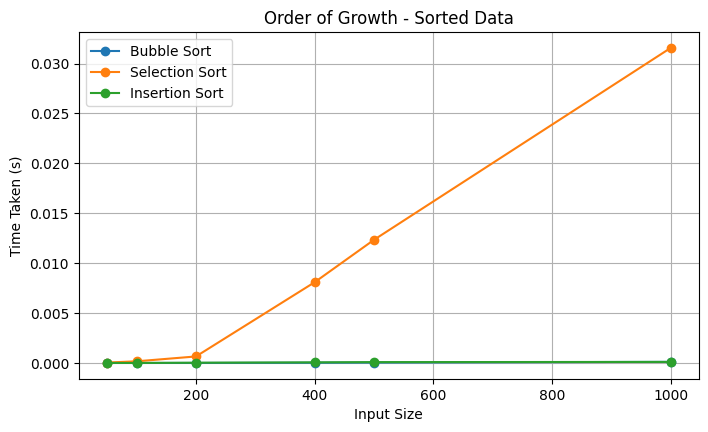

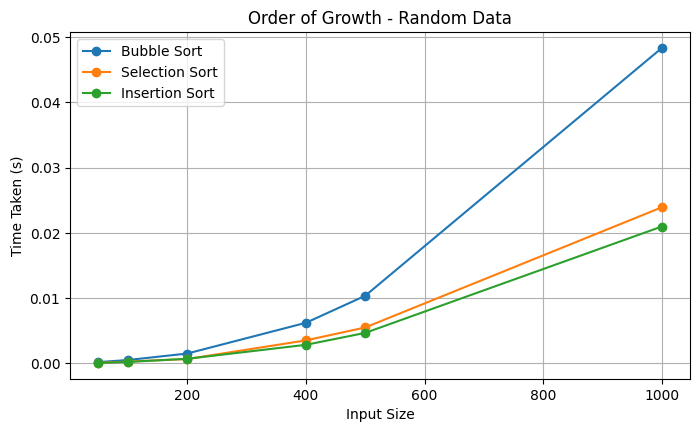

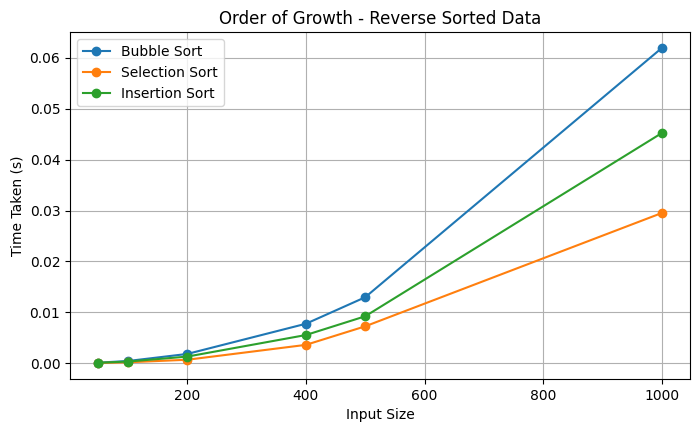

In [3]:
# %% [markdown]
# Sorting Bench: Bubble, Selection, Insertion — timing & plots

# %% Imports & setup
import random, time
from typing import List, Callable, Dict
import matplotlib.pyplot as plt
import pandas as pd

# Make plots appear inside the notebook
%matplotlib inline

random.seed(42)

# %% Sorting algorithms
def bubble_sort(a: List[int]) -> None:
    n = len(a) # lenght of array
    for i in range(n):
        swapped = False
        # After i passes, the last i items are already in place.
        for j in range(0, n - i - 1):
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]
                swapped = True
        if not swapped:  # already sorted — short-circuit
            break

def selection_sort(a: List[int]) -> None:
    n = len(a)
    for i in range(n):
        m = i
        # Find the smallest value in a[i+1 ... n-1]
        for j in range(i + 1, n):
            if a[j] < a[m]:
                m = j
        # Swap the found minimum into position i
        if m != i:
            a[i], a[m] = a[m], a[i]

def insertion_sort(a: List[int]) -> None:
    for i in range(1, len(a)):
        key = a[i]  # Item to insert
        j = i - 1
        # Shift larger items up one slot until the correct spot for 'key' is found
        while j >= 0 and a[j] > key:
            a[j + 1] = a[j]
            j -= 1
        a[j + 1] = key  # Place 'key' into the hole we just made

ALGS: Dict[str, Callable[[List[int]], None]] = {
    "Bubble Sort": bubble_sort,
    "Selection Sort": selection_sort,
    "Insertion Sort": insertion_sort,
}

# %% Data generators
SIZES = [50, 100, 200, 400, 500, 1000]

def gen_sorted(n: int) -> List[int]:
    return list(range(n))

def gen_random(n: int) -> List[int]:
    # sample from a wider range to reduce duplicates
    return random.sample(range(n * 10), n)

def gen_reverse(n: int) -> List[int]:
    return list(range(n, 0, -1))

DATASETS = {
    "Sorted": gen_sorted,
    "Random": gen_random,
    "Reverse Sorted": gen_reverse,
}

# %% Timing helper
def time_alg(alg: Callable[[List[int]], None], data: List[int]) -> float:
    arr = data.copy()                          # don't mutate the original
    start = time.perf_counter()
    alg(arr)
    return time.perf_counter() - start

# %% Run
records = []
for dname, gen in DATASETS.items():
    for n in SIZES:
        base = gen(n)
        for aname, alg in ALGS.items():
            t = time_alg(alg, base)
            records.append({"Dataset": dname, "Input Size": n,
                            "Algorithm": aname, "Time (s)": t})

df = pd.DataFrame(records).sort_values(["Dataset", "Algorithm", "Input Size"])
display(df)  # interactive timing table

# df.to_csv("sorting_timings.csv", index=False)

# %% Plotting (three separate charts, one per dataset)
def plot_dataset(dataset_name: str):
    sub = df[df["Dataset"] == dataset_name]
    plt.figure(figsize=(8, 4.5))
    for aname in ALGS.keys():
        s = sub[sub["Algorithm"] == aname].sort_values("Input Size")
        plt.plot(s["Input Size"], s["Time (s)"], marker="o", label=aname)
    plt.title(f"Order of Growth - {dataset_name} Data")
    plt.xlabel("Input Size")
    plt.ylabel("Time Taken (s)")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_dataset("Sorted")
plot_dataset("Random")
plot_dataset("Reverse Sorted")